In [13]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, ConfusionMatrixDisplay,confusion_matrix)
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.round(0.5) 

0.0

# Logistic Regression

## Exercise 1 - Load the dataset

* Load the diabetes dataset (`diabetes.csv`)
* Make a 70/30 train test partition of the dataset

*Suggestion:* I suggest you load it with pandas, but make a scikit-learn style dataset (`X, y` numpy arrays)

In [7]:
data = pd.read_csv('diabetes.csv')

X = data.loc[:, data.columns != 'Outcome'].values

y = data['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

## Excercise 2 - Binary Case

Write the following functions in order to learn $w$ according to the assumptions described on Section 4 of the Bishop book:

* `sigmoid(a)`: this function should implement equation 4.59
* `binary_cross_entropy(y, y_hat)`: This is the error function defined in equation 4.90 (In the book `y` is written as `t` and `y_hat` as `y`). Remember that while `y` can only be 0 or 1, `y_hat` is continuous.
* `error_gradient(X, y, y_hat)`: This calculates the gradient of the error function with respect to the parameters, to be used later in a gradient descent optimizer. You've seen this in Section 3.1.3 (see equation 3.22 for the update rule), the gradient of the error function with respect to the parameters is written in equation 4.91

*Note:* In Bishop's book, most equations integrate the bias term ($w_0$) into the basis functions, which equates to adding a column of ones to the data to represent that "feature". It is your choice whether to follow that, or use the partial derivative with respect to $w_0$. Most machine learning frameworks (including scikit-learn) separate these derivatives.

In [8]:
def sigmoid(a):
    return 1.0/(1.0 + np.exp(-a))

def binary_cross_entropy(y, y_hat):
    return -np.sum(y*(np.log(y_hat)) + (1 - y)*np.log(1 - y_hat))

def error_gradient(X, y, y_hat):
    error = y_hat - y
    dw = np.dot(X.T, error)
    db = np.sum(error)
    return dw, db

# Exercise 2.1 - Training Loop

Implement a `logistic_regression_bsgd` using the Batch stochastic gradient descent algorithm using the skeleton provided below

In [4]:
def logistic_regression_bsgd(X:np.ndarray, y:np.ndarray, batch_size=10, epochs=1000, lr=1e-6):
    """
    Uses gradient descent to learn the parameters of 
    the logistic regression algoritm (Bishop's equation 4.87)
    
    Parameters
    ----------
    X : array
        features
    y : array
        labels
    batch_size : int 
        batch size of the stochastic gradient descent
    lr : float
        learning rate for the stochastic gradient descent
    
    Returns
    -------
    w : array
        weights (learnt parameters)
    b : float
        bias (w_0)
    errors : array
        errors at each epoch
        
    Notes
    -----
    all parameters are initialized to zero
    """
    # m is the number of samples, while n is the number of features
    m, n = X.shape

    # initialize parameters
    w = np.zeros((n, ))
    b = 0.0

    # variable to collect errors
    errors = []
    
    # training loop
    for epoch in range(epochs):

        for i in range( (m-1) // batch_size + 1):
            print(i)
            batch_start = i * batch_size
            batch_end = batch_start + batch_size
            
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]
            
            # get the predictions with the current parameters
            y_pred = sigmoid(np.dot(X_batch, w) + b)

            # get the gradients
            dw, db = error_gradient(X_batch, y_batch, y_pred)

            # update the parameters
            w -= lr*dw
            b -= lr*db

        # calculate the error using binary cross entropy
        error = binary_cross_entropy(y, sigmoid(np.dot(X, w) + b))
        errors.append(error)
    return w, b, errors

# Exercise 2.2 - Visualise training 

PLot the evolution of the errors

In [11]:
w, b, errors = logistic_regression_bsgd(X_train, y_train, epochs=100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32

<AxesSubplot:xlabel='Epoch', ylabel='Error Batch SGD'>

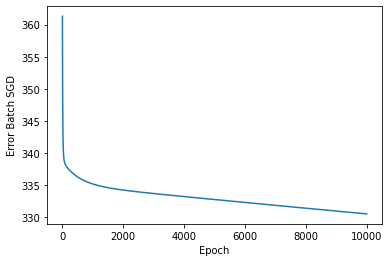

In [6]:
error_df = pd.DataFrame(zip(range(len(errors)), errors), columns=['Epoch', 'Error Batch SGD'])
sns.lineplot(data=error_df, x='Epoch', y='Error Batch SGD')

# Exercise 2.3 - Make a scikit-learn estimator, train it and evaluate it

* Use the code you wrote to build a scikit-learn estimator `BinaryLogisticRegressionBatchGD` (you may pick a nicer name) that implments your version of the logistic regression
* Train it on the training set
* Predict on the test set, and check plot:
    * a confusion matrix with the performance
    * a ROC curve
    * a PR curve

In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y

class BinaryLogisticRegressionBatchGD(BaseEstimator, ClassifierMixin):
    def __init__(self, batch_size=10, epochs=10000, learning_rate=1e-6):
        self.classes_ = []
        self.coef_ = None
        self.intercept_ = None
        self.batch_size = batch_size
        self.epochs = epochs
        self.learning_rate = learning_rate
        
    def _fit_priors(self, y):
        for label in self.labels_:
            self.priors_[label] = y[y == label].shape[0] / y.shape[0]
    
    def _fit_gaussians(self, X, y):
        for label in self.labels_:
            X_label = X[y == label]
            gm = GaussianMixture(n_components=1).fit(X_label)
            self.gms_[label] = gm 
            self.gaussians_[label] = multivariate_normal(mean=gm.means_[0], 
                                                         cov=gm.covariances_[0]).pdf
    def predict_proba(self, X):
        return sigmoid(np.dot(X, w) + b)
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = np.unique(y)
        self.coef_, self.intercept_, _ = logistic_regression_bsgd(X, y, 
                                                                  batch_size=self.batch_size,
                                                                  epochs=self.epochs,
                                                                  lr=self.learning_rate)
        return self
            
    def predict(self, X):
        return np.round(self.predict_proba(X))


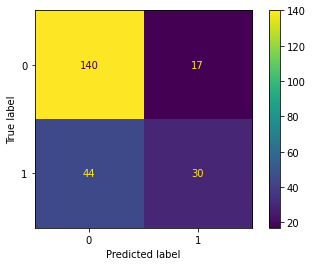

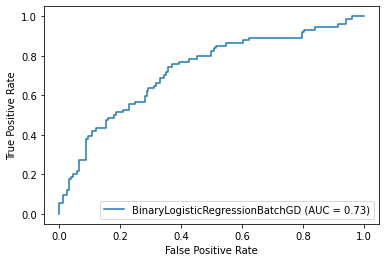

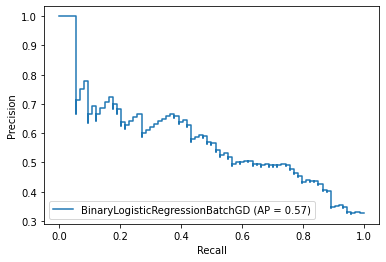

In [8]:
blr = BinaryLogisticRegressionBatchGD()
blr.fit(X_train, y_train)
plot_confusion_matrix(blr, X_test, y_test)
plot_roc_curve(blr, X_test, y_test)
plot_precision_recall_curve(blr, X_test, y_test)

# Exercise 3 - Comparing to other models

Use the same training and testing data to train other classifiers from scikit-learn, as well as the. I suggest you try:

* From Scikit-learn:
    * LogisticRegression
    * SGDClassifier, configured for logistic regression (read the documentation). Try to replicate the settings above as much as possible.
    * kNN
* a pipeline that uses the estimator that you coded today, using a StandardScaler transformer before the estimator
* The SingleGaussianClassifier from the previous lab

For each model, plot:
* the confusion matrix
* ROC curve
* Precision Recall curve

In [9]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal


class SingleGaussianClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.classes_ = []
        self.priors_ = {}
        self.gaussians_ = {}
        self.gms_ = {}
        
    def _fit_priors(self, y):
        for label in self.classes_:
            self.priors_[label] = y[y == label].shape[0] / y.shape[0]
    
    def _fit_gaussians(self, X, y):
        for label in self.classes_:
            X_label = X[y == label]
            gm = GaussianMixture(n_components=1).fit(X_label)
            self.gms_[label] = gm 
            self.gaussians_[label] = multivariate_normal(mean=gm.means_[0], 
                                                         cov=gm.covariances_[0]).pdf
    def predict_proba(self, X):
        posteriors = [] # not the actual posterior, but enough to maximise the likelihood for classification
        for label in self.classes_:
            posteriors += [self.gaussians_[label](X) * self.priors_[label]]
        return np.array(posteriors).T
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = np.unique(y)
        self._fit_priors(y)
        self._fit_gaussians(X, y)
        return self
            
    def predict(self, X):
        return np.array([self.classes_[i] for i in np.argmax(self.predict_proba(X), axis=1)]) 

training Bin LR BatchSGD
training Pipeline
training LogisticRegression
training SGDClassifier
training kNN
training SingleGaussianClassifier


/Users/torresmateo/.virtualenvs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


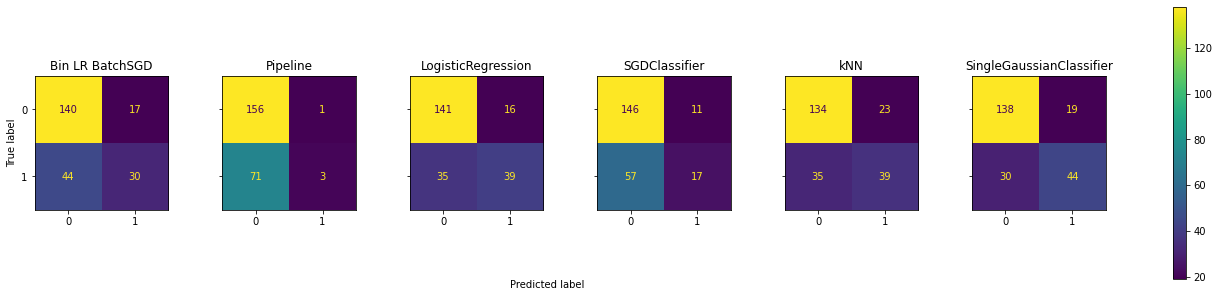

In [10]:
models = {
    'Bin LR BatchSGD': BinaryLogisticRegressionBatchGD(),
    'Pipeline': make_pipeline(StandardScaler(), BinaryLogisticRegressionBatchGD()),
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=1e-6),
    'kNN': KNeighborsClassifier(),
    'SingleGaussianClassifier':SingleGaussianClassifier()
}

# The confusion matrix plots were adapted from here: https://stackoverflow.com/a/61832388/943138

f, axs = plt.subplots(1, len(models), 
                       figsize=(4*len(models),5), 
                       sharey='row')
for i, (name, model) in enumerate(models.items()):
    ax = axs[i]
    print(f'training {name}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    c_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(c_matrix, 
                                  display_labels=model.classes_)
    disp.plot(ax=ax)
    ax.set_title(name)
    disp.im_.colorbar.remove()
    ax.set_xlabel('')
    if i > 0:
        ax.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.colorbar(disp.im_, ax=axs)
plt.show()
plt.close('all')

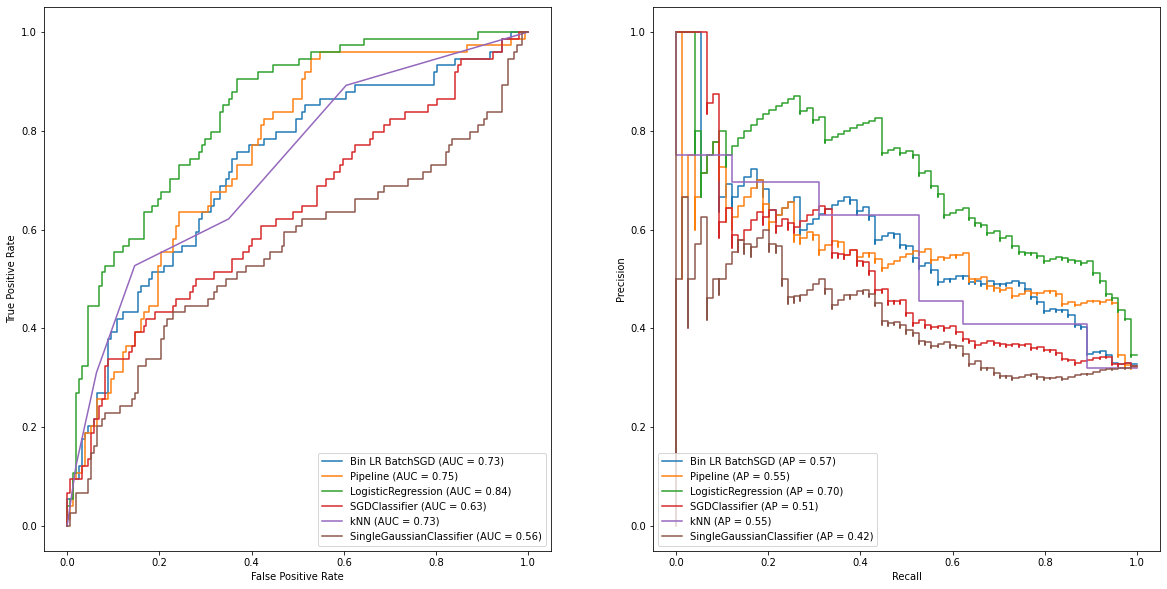

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
for name, model in models.items():
    plot_roc_curve(model, X_test, y_test, ax=axs[0], name=name)
    plot_precision_recall_curve(model, X_test, y_test, ax=axs[1], name=name)
plt.show()
plt.close('all')